In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
mask_file = '/data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz'
hollywood_mashup_db = niidb.FMriActivationsDb('data/hollywood_mashup.db')

In [6]:
dtfa = DTFA.DeepTFA(hollywood_mashup_db.all(), mask=mask_file, num_factors=100, embedding_dim=2, model_time_series=True)

08/09/2019 15:33:57 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-01.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
08/09/2019 15:33:58 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-02.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
08/09/2019 15:33:58 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/subject-01_run-03.nii.gz with mask /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/full-mask.nii.gz (zscore=False, smooth=6)
08/09/2019 15:33:59 Loading Nifti image /data/datasets/siskind/fmri-datasets/hollywood-mashup/processed/experiments/subject-01/

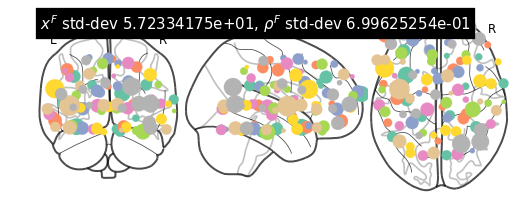

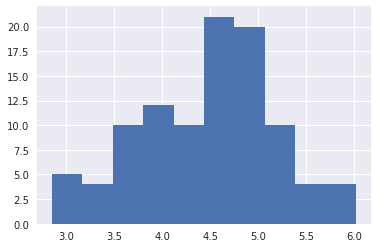

(<nilearn.plotting.displays.OrthoProjector at 0x7f3f8cbb6ba8>,
 tensor([[ 1.2392e+01, -2.8128e+01, -2.3218e+01],
         [-3.6073e+01,  3.9939e+01,  3.4813e+01],
         [-1.7067e+01, -2.9975e+01,  2.5817e+01],
         [ 4.2760e+01,  3.3429e+01,  2.9574e+01],
         [-4.8207e+01, -5.0581e+01,  7.2587e+00],
         [ 3.9880e+01, -4.0245e+01,  2.5999e+01],
         [ 2.9006e+01,  2.4548e+00, -9.0928e+00],
         [ 1.4799e+01,  7.7192e+01,  1.6952e+01],
         [-3.3502e+01,  1.4149e+01, -1.8013e+01],
         [-3.2735e+01, -1.1869e+01, -1.9676e+01],
         [ 8.9469e+00, -7.0082e+01, -2.0546e+01],
         [ 9.1057e+00,  3.4586e+01,  2.5521e+01],
         [ 6.8865e+01,  5.5327e+00,  1.0600e+01],
         [ 2.3302e+01,  2.9095e+01,  4.7472e+01],
         [ 5.2201e+01,  4.6086e+01,  6.6199e+00],
         [-4.3377e+01, -1.0552e+01,  4.2163e+01],
         [-5.6015e+01,  5.5816e+01, -1.1484e+01],
         [-1.1825e-01, -5.5163e+01,  2.4386e+01],
         [ 4.6064e+00, -1.9115e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=2,
                    batch_size=1, use_cuda=True, checkpoint_steps=100, blocks_batch_size=25, patience=100)

08/09/2019 15:36:35 [Epoch 1] (85495ms) Posterior free-energy 1.64938912e+08 = KL from prior 2.29986400e+06 - log-likelihood -1.63309088e+08
08/09/2019 15:36:35 Saving checkpoint...
08/09/2019 15:37:59 [Epoch 2] (84287ms) Posterior free-energy 1.51019136e+08 = KL from prior 2.23958750e+06 - log-likelihood -1.48987872e+08
08/09/2019 15:39:24 [Epoch 3] (84779ms) Posterior free-energy 1.48030800e+08 = KL from prior 2.12982500e+06 - log-likelihood -1.46008720e+08
08/09/2019 15:40:50 [Epoch 4] (86038ms) Posterior free-energy 1.46721840e+08 = KL from prior 1.91897925e+06 - log-likelihood -1.44880144e+08
08/09/2019 15:42:16 [Epoch 5] (86119ms) Posterior free-energy 1.45641584e+08 = KL from prior 1.62555475e+06 - log-likelihood -1.44283456e+08
08/09/2019 15:43:41 [Epoch 6] (84544ms) Posterior free-energy 1.45220400e+08 = KL from prior 1.35900675e+06 - log-likelihood -1.43911216e+08
08/09/2019 15:45:05 [Epoch 7] (84279ms) Posterior free-energy 1.44782224e+08 = KL from prior 1.15973875e+06 - log

Epoch   699: reducing learning rate of group 0 to 5.0000e-03.
Epoch   699: reducing learning rate of group 1 to 5.0000e-05.


08/10/2019 07:39:59 [Epoch 701] (82224ms) Posterior free-energy 1.32873728e+08 = KL from prior 1.14948344e+05 - log-likelihood -1.33295680e+08
08/10/2019 07:39:59 Saving checkpoint...
08/10/2019 07:41:22 [Epoch 702] (82307ms) Posterior free-energy 1.32661296e+08 = KL from prior 1.14262469e+05 - log-likelihood -1.33210992e+08
08/10/2019 07:42:44 [Epoch 703] (82656ms) Posterior free-energy 1.31646224e+08 = KL from prior 1.14583359e+05 - log-likelihood -1.33205024e+08
08/10/2019 07:44:06 [Epoch 704] (82173ms) Posterior free-energy 1.33309392e+08 = KL from prior 1.14637914e+05 - log-likelihood -1.33207056e+08
08/10/2019 07:45:29 [Epoch 705] (82690ms) Posterior free-energy 1.32652352e+08 = KL from prior 1.14327875e+05 - log-likelihood -1.33202224e+08
08/10/2019 07:46:52 [Epoch 706] (82439ms) Posterior free-energy 1.32273624e+08 = KL from prior 1.14490469e+05 - log-likelihood -1.33201248e+08
08/10/2019 07:48:14 [Epoch 707] (82581ms) Posterior free-energy 1.33302512e+08 = KL from prior 1.1435

Epoch   820: reducing learning rate of group 0 to 2.5000e-03.
Epoch   820: reducing learning rate of group 1 to 2.5000e-05.


08/10/2019 10:26:25 [Epoch 822] (82544ms) Posterior free-energy 1.32118856e+08 = KL from prior 1.16303922e+05 - log-likelihood -1.33138608e+08
08/10/2019 10:27:47 [Epoch 823] (82446ms) Posterior free-energy 1.32207224e+08 = KL from prior 1.15799898e+05 - log-likelihood -1.33120680e+08
08/10/2019 10:29:10 [Epoch 824] (82749ms) Posterior free-energy 1.32274024e+08 = KL from prior 1.16021266e+05 - log-likelihood -1.33118960e+08
08/10/2019 10:30:33 [Epoch 825] (82938ms) Posterior free-energy 1.32680312e+08 = KL from prior 1.16015398e+05 - log-likelihood -1.33118152e+08
08/10/2019 10:31:56 [Epoch 826] (82620ms) Posterior free-energy 1.31761128e+08 = KL from prior 1.16031734e+05 - log-likelihood -1.33116968e+08
08/10/2019 10:33:18 [Epoch 827] (82645ms) Posterior free-energy 1.31821640e+08 = KL from prior 1.16092578e+05 - log-likelihood -1.33113984e+08
08/10/2019 10:34:41 [Epoch 828] (82418ms) Posterior free-energy 1.32413840e+08 = KL from prior 1.16151781e+05 - log-likelihood -1.33115568e+08

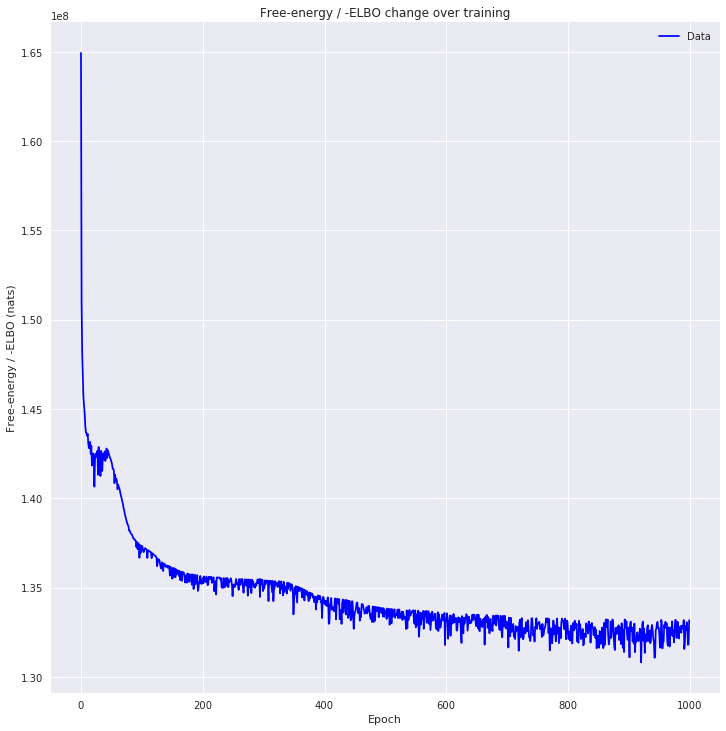

In [9]:
utils.plot_losses(losses)

In [10]:
def hollywood_mashup_labeler(block):
    subject = str(block.subject)
    task = block.task
    return 'Subject ' + subject + ', ' + task + ' stimulus'

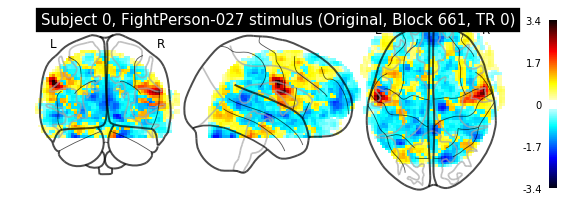

08/10/2019 14:31:23 Reconstruction Error (Frobenius Norm): 9.67614594e+01 out of 1.00010139e+02


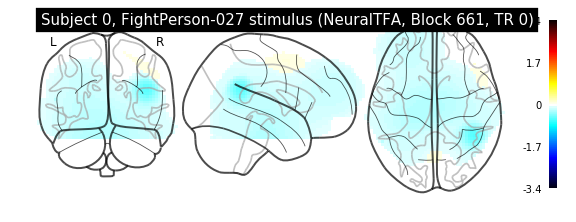

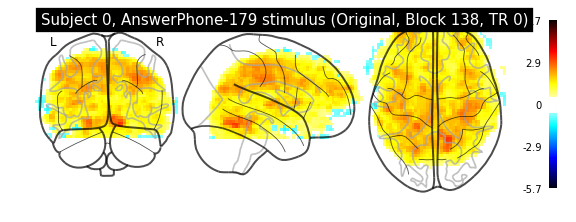

08/10/2019 14:31:25 Reconstruction Error (Frobenius Norm): 1.12226593e+02 out of 2.09228043e+02


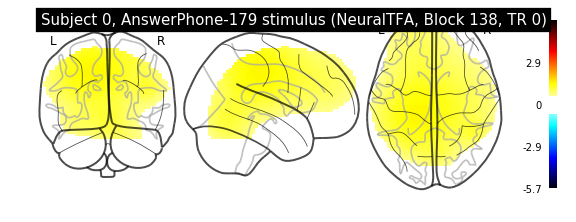

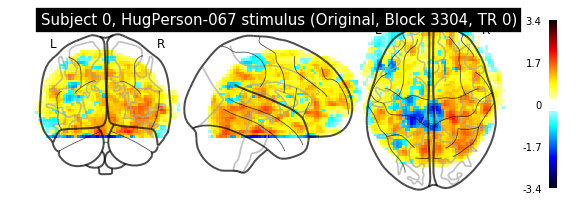

08/10/2019 14:31:27 Reconstruction Error (Frobenius Norm): 9.16434555e+01 out of 1.13529274e+02


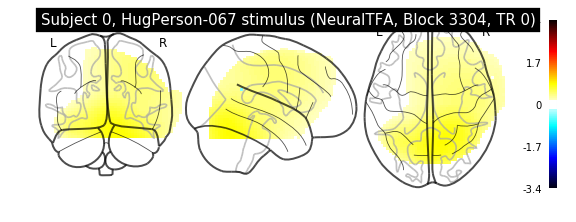

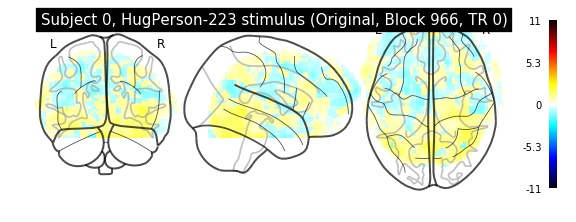

08/10/2019 14:31:29 Reconstruction Error (Frobenius Norm): 8.60084457e+01 out of 9.44739914e+01


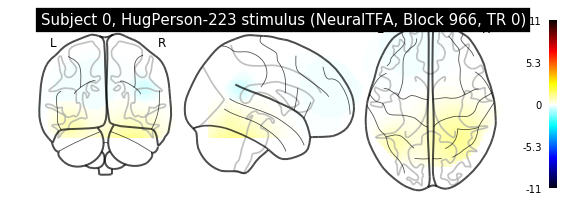

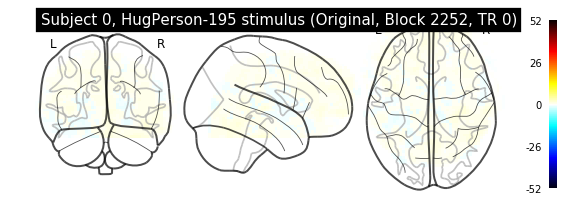

08/10/2019 14:31:32 Reconstruction Error (Frobenius Norm): 7.49138184e+01 out of 8.51046295e+01


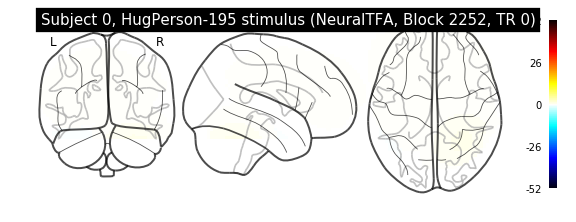

In [11]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=hollywood_mashup_labeler)
    dtfa.plot_reconstruction(b, labeler=hollywood_mashup_labeler)

In [12]:
def task_labeler(task):
    return task.partition('-')[0]

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


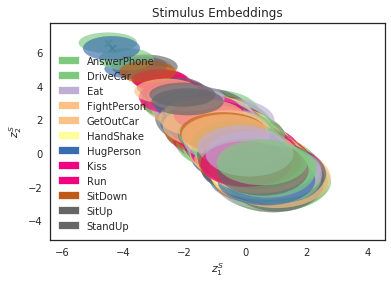

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


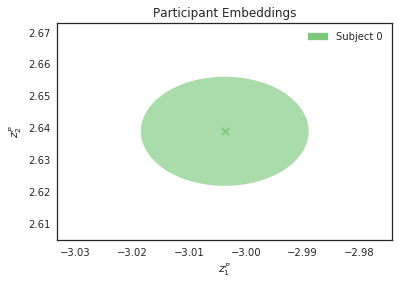

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

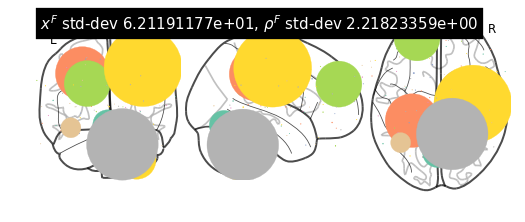

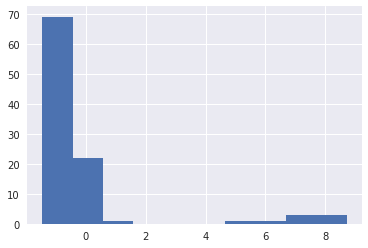

(<nilearn.plotting.displays.OrthoProjector at 0x7f3f802f9080>,
 tensor([[  8.4507, -29.8579, -34.1248],
         [-43.5707,  41.9554,  30.9264],
         [-14.6788, -48.4862,  27.4283],
         [ 47.4294,  36.3242,  23.4327],
         [-58.0044, -57.8692,   9.5917],
         [ 44.0589, -46.6803,  22.5280],
         [ 33.7428,  16.9984,  -2.2489],
         [ 25.7256,  91.7378,  21.2764],
         [-33.8799,   1.4290, -24.6011],
         [-55.0098,  -7.2122, -16.7377],
         [ -0.8256, -67.5011, -15.7444],
         [  8.5524,  44.3916,  28.1441],
         [ 70.5650,  17.8993,  13.5124],
         [ 24.3031,  23.7816,  42.6661],
         [ 55.2950,  41.0894,  15.7010],
         [-54.2075, -26.0328,  43.5068],
         [-44.4388,  46.2994, -13.0176],
         [-27.3773, -33.6693,  37.8948],
         [ -8.8762,  -9.4379,  50.2229],
         [ 23.8121, -42.0190,   5.8043],
         [-50.1072, -38.0401, -22.3334],
         [-17.7020,  -2.4270,   3.3131],
         [ 40.5341, -26.4487,  38.1

In [16]:
dtfa.visualize_factor_embedding()

In [17]:
dtfa.average_reconstruction_error()

08/10/2019 14:33:54 Average reconstruction error (MSE): 4.30120843e-01
08/10/2019 14:33:54 Average data norm (Euclidean): 4.98781199e-01
08/10/2019 14:33:54 Percent average reconstruction error: 0.402954


(0.43012084326210837, 0.49878119884164446, 0.004029540625200611)

In [18]:
dtfa.average_reconstruction_error(weighted=False)

08/10/2019 14:35:59 Average reconstruction error (MSE): 9.35753375e+01 +/- 1.57826800e+01
08/10/2019 14:35:59 Average data norm (Euclidean): 1.07114003e+02 +/- 2.52306394e+01
08/10/2019 14:35:59 Percent average reconstruction error: 88.540977 +/- 8.01723911e+00


(array([97.8048172 , 78.41756439, 92.00862122, ..., 85.98538971,
        76.13969421, 83.45477295]),
 array([100.90693665,  82.19390106,  94.65022278, ...,  98.21504211,
         83.87232208,  93.06697845]),
 array([0.96925762, 0.95405576, 0.97209091, ..., 0.87548086, 0.90780477,
        0.89671734]))